# Key Resume Attributes Impacting Job Callbacks

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset 1 - "resume.csv"

1. reading and understanding the data
1.1 Importing the dataset

In [3]:
df = pd.read_csv('resume.csv')

1.2 Understanding the dataset

In [4]:
df.shape

(4870, 30)

In [5]:
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4870 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

In [6]:
df.head(10)

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
5,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,1,0,6,0,1,0,0,0,0,low
6,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,0,1,5,1,1,1,0,0,1,high
7,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,0,21,1,1,1,0,1,1,high
8,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,0,0,3,1,1,0,0,0,0,low
9,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,0,1,6,0,1,1,0,0,1,high


In [7]:
df.describe()

,job_ad_id,job_fed_contractor,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,3102.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,651.777823,0.114765,0.291170,0.787269,0.124846,0.106776,0.437166,0.072690,0.080493,3.618480,0.719507,0.052772,0.559548,7.842916,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,388.690698,0.318789,0.454349,0.409281,0.330578,0.308860,0.496087,0.259654,0.272083,0.714997,0.449286,0.223601,0.496492,5.044612,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,647.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,979.750000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership                0
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64

In [9]:
#creating a function to find null values for the dataframe
def null_values(data):
    return round((data.isnull().sum()*100/len(data)).sort_values(ascending=False),2)

In [10]:
null_values(df)

job_req_min_experience    56.39
job_fed_contractor        36.30
job_ad_id                  0.00
race                       0.00
has_email_address          0.00
employment_holes           0.00
military                   0.00
volunteer                  0.00
special_skills             0.00
computer_skills            0.00
years_experience           0.00
worked_during_school       0.00
honors                     0.00
college_degree             0.00
years_college              0.00
gender                     0.00
firstname                  0.00
job_city                   0.00
received_callback          0.00
job_req_school             0.00
job_req_organization       0.00
job_req_computer           0.00
job_req_education          0.00
job_req_communication      0.00
job_req_any                0.00
job_ownership              0.00
job_equal_opp_employer     0.00
job_type                   0.00
job_industry               0.00
resume_quality             0.00
dtype: float64

In [11]:
# Dropping NUll value columns Because majority of data is null and job_ad_id column
df = df.drop(['job_ad_id',"firstname",'job_fed_contractor','job_req_min_experience'],axis=1)

In [12]:
df.isnull().sum()


job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   job_city                4870 non-null   object
 1   job_industry            4870 non-null   object
 2   job_type                4870 non-null   object
 3   job_equal_opp_employer  4870 non-null   int64 
 4   job_ownership           4870 non-null   object
 5   job_req_any             4870 non-null   int64 
 6   job_req_communication   4870 non-null   int64 
 7   job_req_education       4870 non-null   int64 
 8   job_req_computer        4870 non-null   int64 
 9   job_req_organization    4870 non-null   int64 
 10  job_req_school          4870 non-null   object
 11  received_callback       4870 non-null   int64 
 12  race                    4870 non-null   object
 13  gender                  4870 non-null   object
 14  years_college           4870 non-null   int64 
 15  coll

In [14]:
#DIVIDING THE COLUMNS INTO CATEGORICAL AND NUMERICAL LISTS
Categorical = []
Numerical = []

In [15]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical.append(col)
    else:
        Numerical.append(col)

In [16]:
Categorical

['job_city',
 'job_industry',
 'job_type',
 'job_ownership',
 'job_req_school',
 'race',
 'gender',
 'resume_quality']

In [17]:
Numerical

['job_equal_opp_employer',
 'job_req_any',
 'job_req_communication',
 'job_req_education',
 'job_req_computer',
 'job_req_organization',
 'received_callback',
 'years_college',
 'college_degree',
 'honors',
 'worked_during_school',
 'years_experience',
 'computer_skills',
 'special_skills',
 'volunteer',
 'military',
 'employment_holes',
 'has_email_address']

### Callback Rates by Race, Gender and city


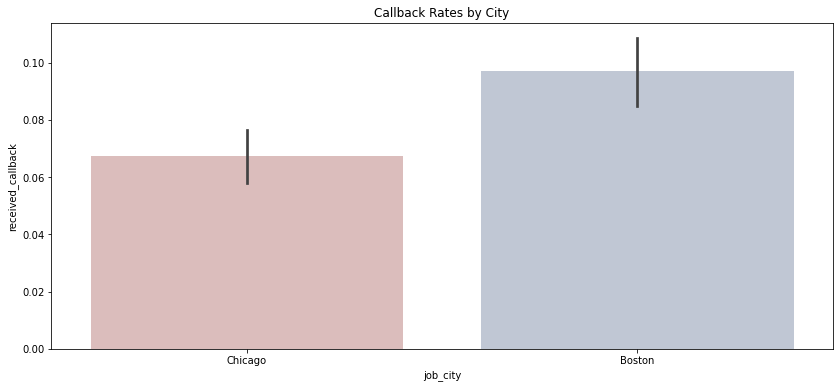

In [18]:
# Callback rates by City

plt.figure(figsize=(14,6))
sns.barplot(data= df, x=df.job_city, y=df.received_callback,palette="vlag_r")
plt.title("Callback Rates by City")
#plt.legend(loc='best')
plt.show()

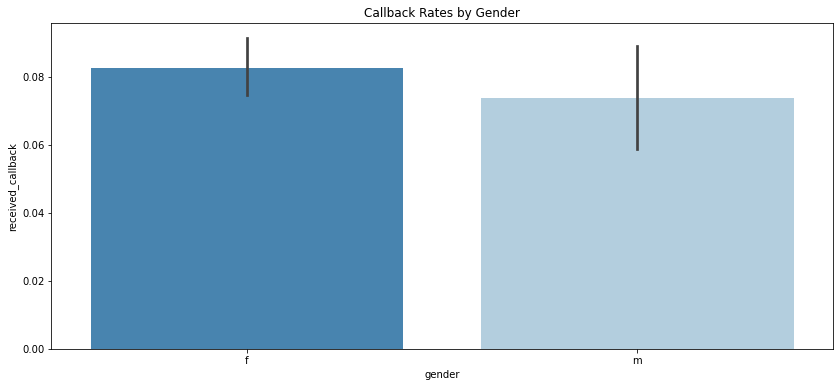

In [19]:
# Callback rates by gender

plt.figure(figsize=(14,6))
sns.barplot(data= df, x=df.gender, y=df.received_callback,palette="Blues_r")
plt.title("Callback Rates by Gender")
#plt.legend(loc='best')
plt.show()

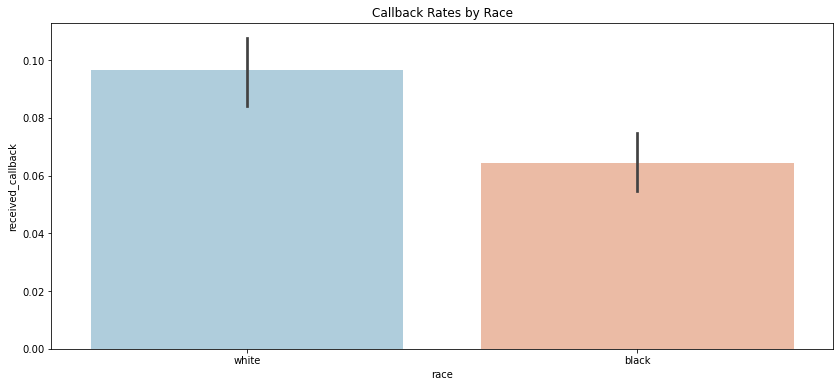

In [20]:
# Callback rates by race

plt.figure(figsize=(14,6))
sns.barplot(data= df, x=df.race, y=df.received_callback,palette="RdBu_r")
plt.title("Callback Rates by Race")
#plt.legend(loc='best')
plt.show()

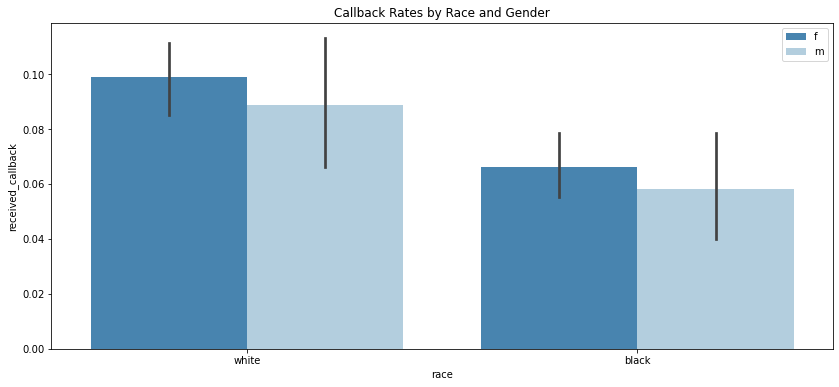

In [21]:
plt.figure(figsize=(14,6))
sns.barplot(data= df, x=df.race, y=df.received_callback, hue=df.gender,palette="Blues_r")
plt.title("Callback Rates by Race and Gender")
plt.legend(loc='best')
plt.show()

### Analyzing callback rates across job attributes


#### Callback rates by Industry 


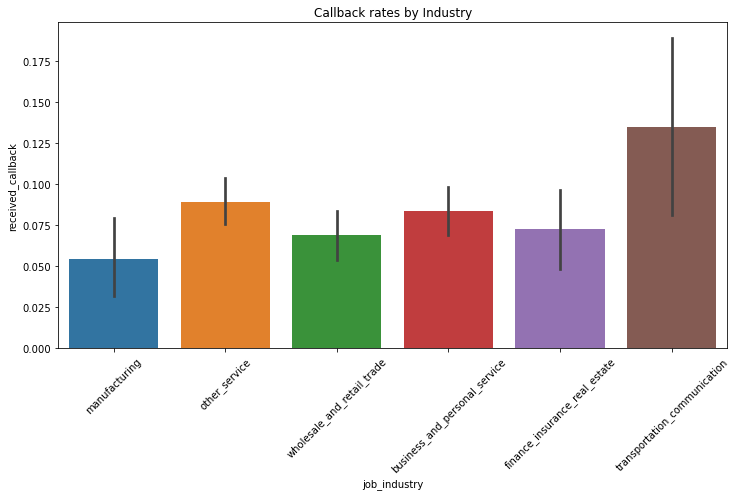

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.job_industry,y=df.received_callback)
plt.xticks(rotation=45)
plt.title('Callback rates by Industry')
plt.show()

### Callback rates by Industry by gender

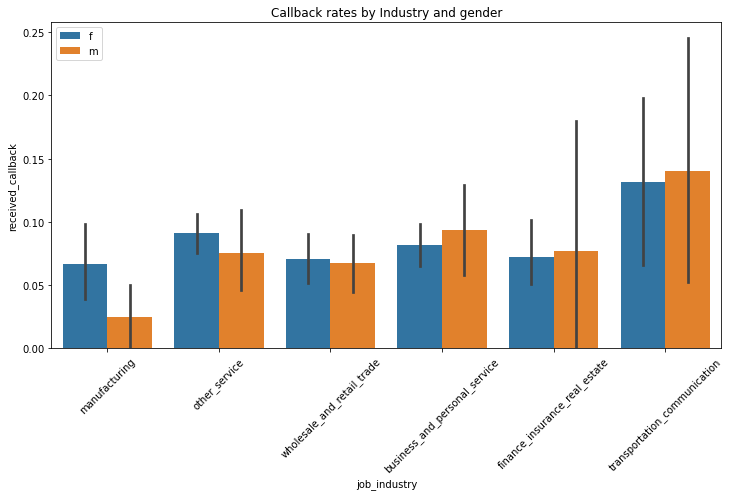

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.job_industry,y=df.received_callback,hue=df.gender)
plt.xticks(rotation=45)
plt.title("Callback rates by Industry and gender")
plt.legend(loc="best")
plt.show()

### Callback rates by Industry by race

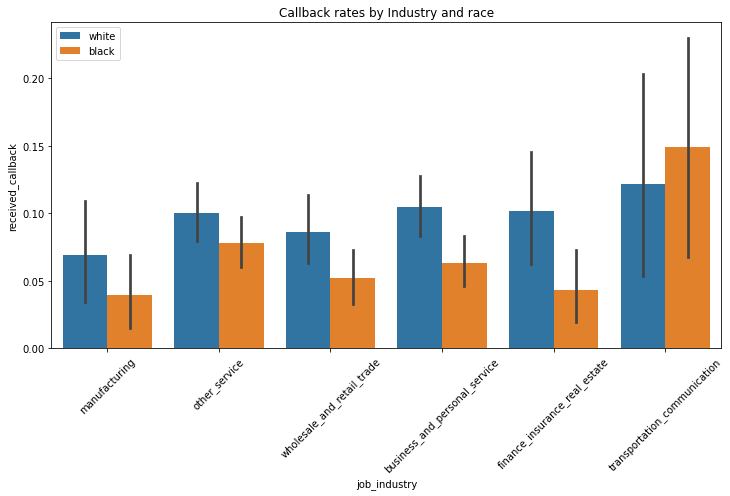

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.job_industry,y=df.received_callback,hue=df.race)
plt.xticks(rotation=45)
plt.title("Callback rates by Industry and race")
plt.legend(loc="best")
plt.show()

### Callback rates by job type

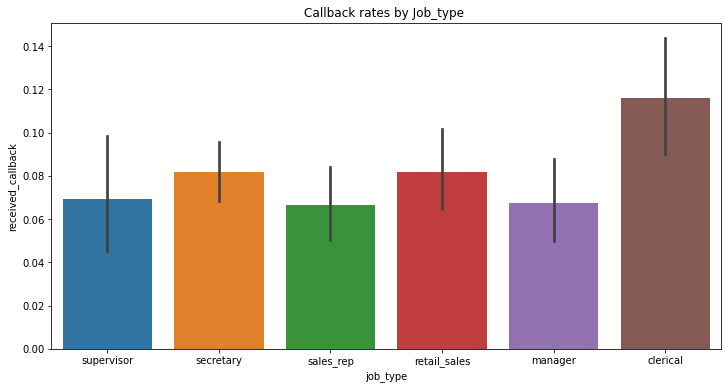

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.job_type,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by Job_type ')
plt.show()

### Callback rates by job type by gender

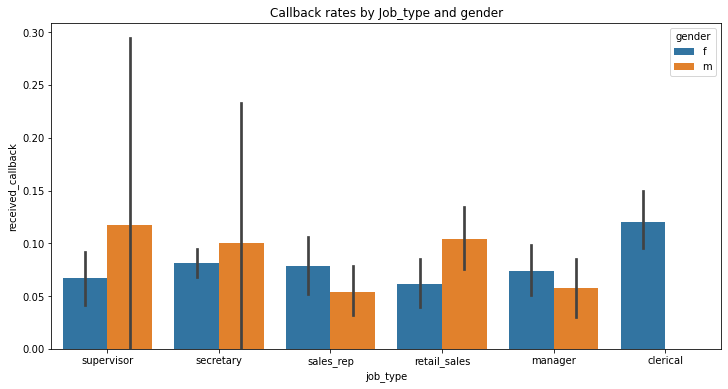

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.job_type,y=df.received_callback,hue=df.gender)
plt.xticks(rotation=False)
plt.title('Callback rates by Job_type and gender')
plt.show()

### Callback rates by job type by race

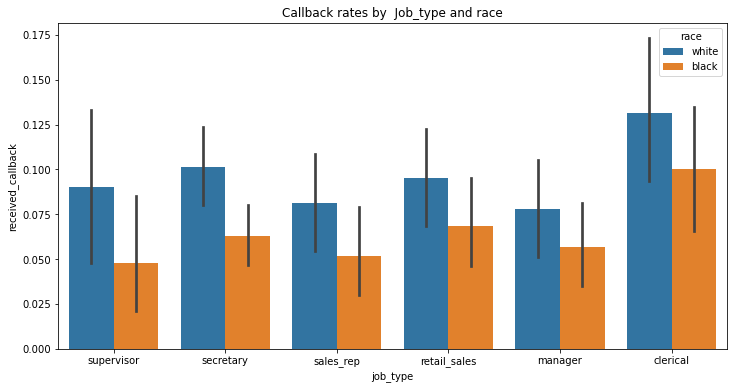

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.job_type,y=df.received_callback,hue=df.race)
plt.xticks(rotation=False)
plt.title('Callback rates by  Job_type and race')
plt.show()

### Callback rates by company types

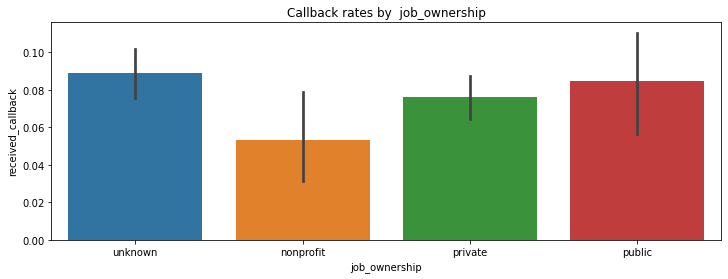

In [28]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.job_ownership,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by  job_ownership')
plt.show()

### Callback rates by company types and Gender


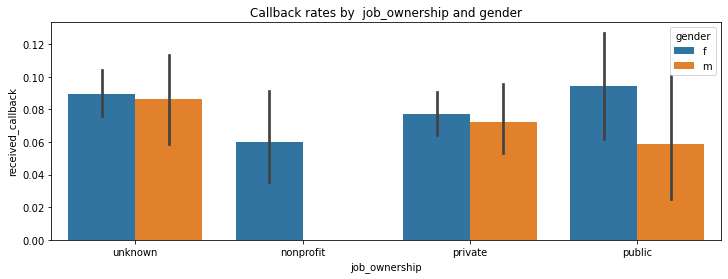

In [29]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.job_ownership,y=df.received_callback,hue=df.gender)
plt.xticks(rotation=False)
plt.title('Callback rates by  job_ownership and gender')
plt.show()

### Callback rates by company types and race


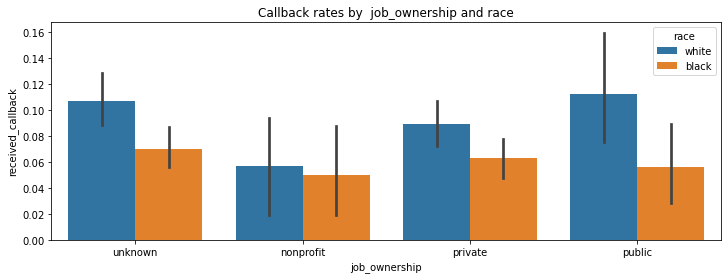

In [30]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.job_ownership,y=df.received_callback,hue=df.race)
plt.xticks(rotation=False)
plt.title('Callback rates by  job_ownership and race')
plt.show()

### Distribution of job attributes

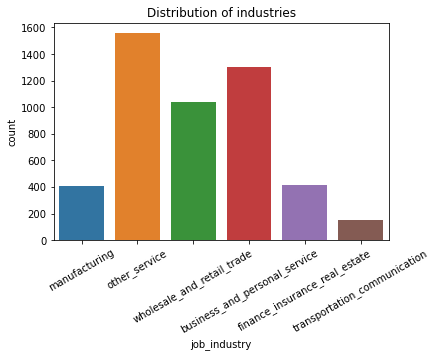

In [31]:
sns.countplot(df.job_industry)
plt.xticks(rotation=30)
plt.title("Distribution of industries")
plt.show()

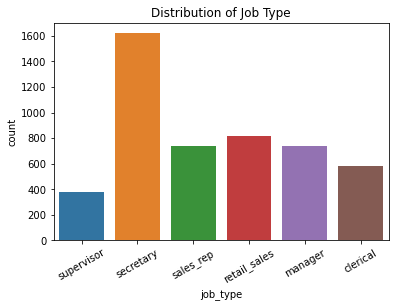

In [32]:
sns.countplot(df.job_type)
plt.xticks(rotation=30)
plt.title("Distribution of Job Type")
plt.show()

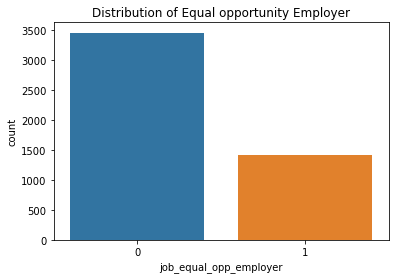

In [33]:
sns.countplot(df.job_equal_opp_employer)
plt.xticks(rotation=False)
plt.title("Distribution of Equal opportunity Employer")
plt.show()

### Racial Gender Distribution

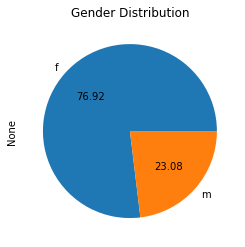

In [34]:
df.groupby("gender").size().plot(kind='pie',autopct='%.2f')
plt.title("Gender Distribution")
plt.show()

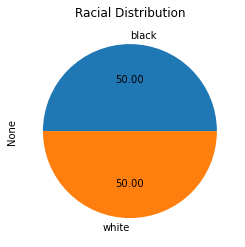

In [35]:
df.groupby("race").size().plot(kind='pie',autopct='%.2f')
plt.title("Racial Distribution")
plt.show()

## Investigating resume characteristics


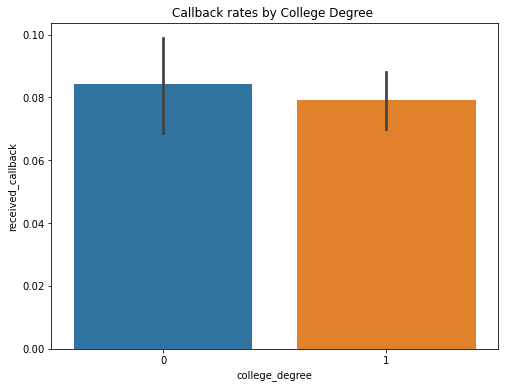

In [36]:
## Callback Rates by College Degree

plt.figure(figsize=(8,6))
sns.barplot(x=df.college_degree,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by College Degree ')
plt.show()

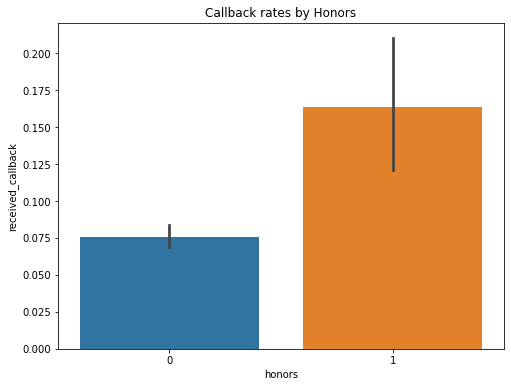

In [37]:
## Callback Rates by Honors

plt.figure(figsize=(8,6))
sns.barplot(x=df.honors,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by Honors')
plt.show()

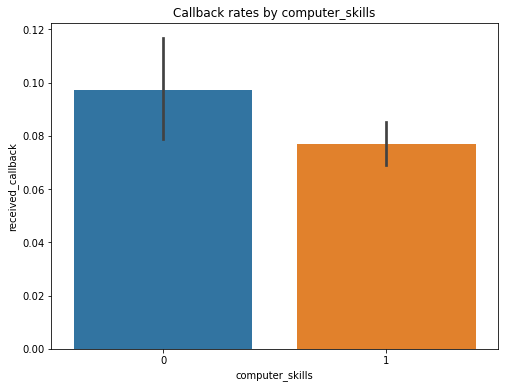

In [38]:
# Callback rates by Computer skills

plt.figure(figsize=(8,6))
sns.barplot(x=df.computer_skills,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by computer_skills')
plt.show()

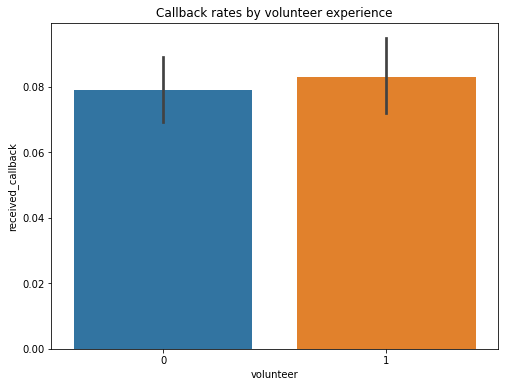

In [39]:
# Callback rates by volunteer experience

plt.figure(figsize=(8,6))
sns.barplot(x=df.volunteer,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by volunteer experience')
plt.show()

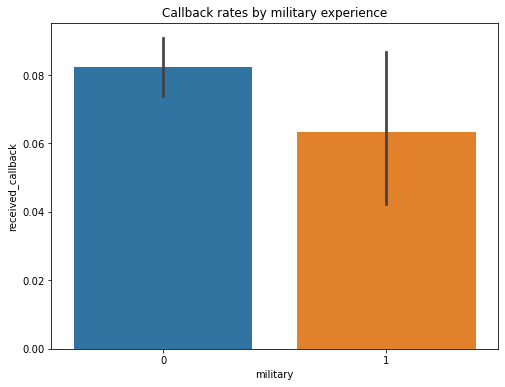

In [40]:
# Callback rates by military experience

plt.figure(figsize=(8,6))
sns.barplot(x=df.military,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by military experience')
plt.show()

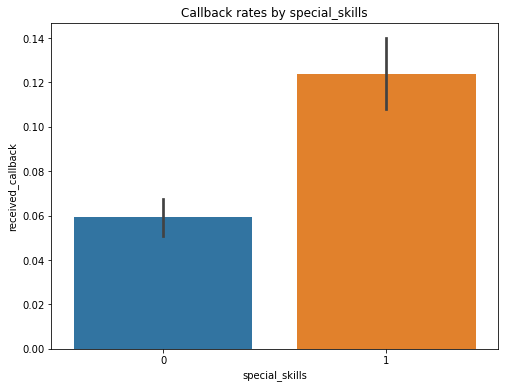

In [41]:
# Callback rates by special_skills

plt.figure(figsize=(8,6))
sns.barplot(x=df.special_skills,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by special_skills')
plt.show()


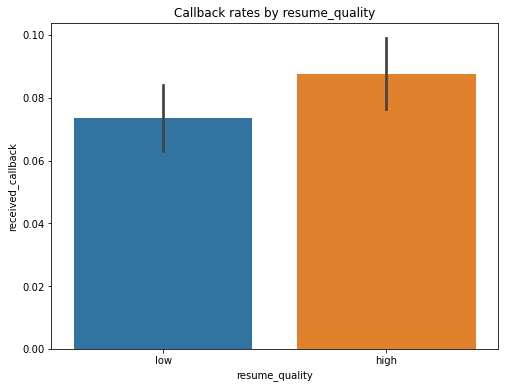

In [42]:
# Callback rates by resume_quality

plt.figure(figsize=(8,6))
sns.barplot(x=df.resume_quality,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by resume_quality')
plt.show()

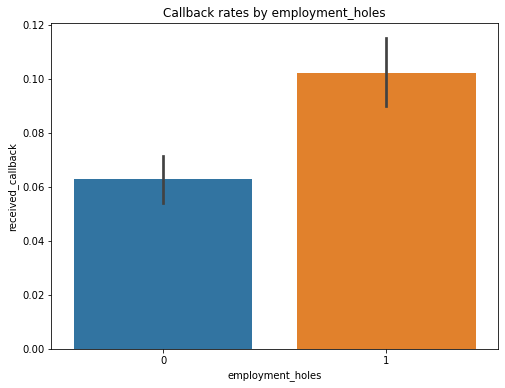

In [43]:
# Callback rates by employment_holes

plt.figure(figsize=(8,6))
sns.barplot(x=df.employment_holes,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by employment_holes')
plt.show()

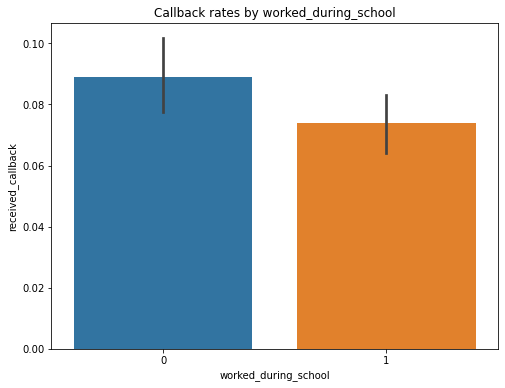

In [44]:
# Callback rates by worked_during_school

plt.figure(figsize=(8,6))
sns.barplot(x=df.worked_during_school,y=df.received_callback)
plt.xticks(rotation=False)
plt.title('Callback rates by worked_during_school')
plt.show()

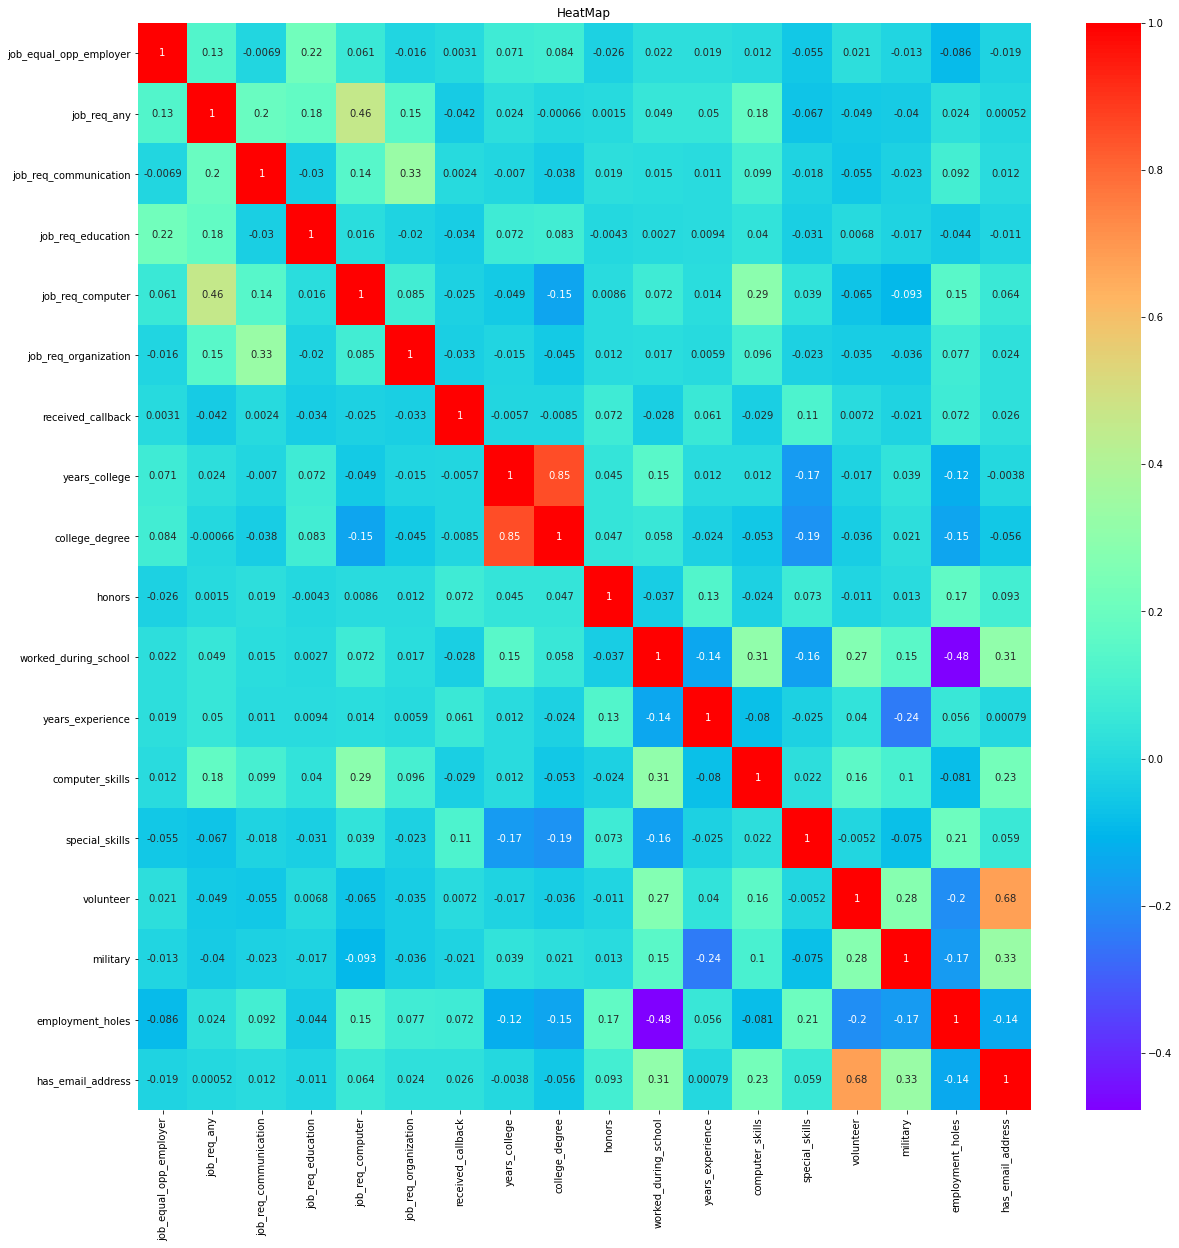

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

In [46]:
df.describe()

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,0.291170,0.787269,0.124846,0.106776,0.437166,0.072690,0.080493,3.618480,0.719507,0.052772,0.559548,7.842916,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,0.454349,0.409281,0.330578,0.308860,0.496087,0.259654,0.272083,0.714997,0.449286,0.223601,0.496492,5.044612,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we see "years_experience" has outliers we will replace outliers with median or mode ("Highest number of occuranace")

In [47]:
df.years_experience.value_counts()

6     817
8     578
7     541
4     537
5     507
2     352
3     194
11    173
9     159
13    154
14    149
10    130
26    104
16     94
18     77
12     69
21     47
19     46
1      45
20     35
15     34
23      9
22      8
25      7
17      3
44      1
Name: years_experience, dtype: int64

In [48]:
np.percentile(df.years_experience,[50,75,90,95,97,99])

array([ 6.,  9., 14., 19., 21., 26.])

In [49]:
## Mode
mode=df.years_experience.mode()
mode

0    6
dtype: int64

In [50]:
## neadian
median= df.years_experience.quantile(0.5)
median

6.0

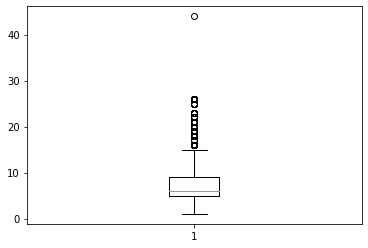

In [51]:
plt.boxplot(df.years_experience)
plt.show()

In [52]:
df.years_experience.describe()

count    4870.000000
mean        7.842916
std         5.044612
min         1.000000
25%         5.000000
50%         6.000000
75%         9.000000
max        44.000000
Name: years_experience, dtype: float64

In [53]:
df["years_experience"] = np.where(df["years_experience"] > df.years_experience.quantile(0.90), median, df['years_experience'])

In [54]:
df.years_experience.describe()

count    4870.000000
mean        6.502464
std         2.872790
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        14.000000
Name: years_experience, dtype: float64

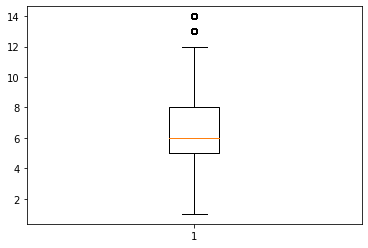

In [55]:
plt.boxplot(df["years_experience"])
plt.show()

Now **df["years_experience"]** is having 14 max, and which is fine 

In [56]:
### Lets check numerical columns agian

df.describe()

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,0.291170,0.787269,0.124846,0.106776,0.437166,0.072690,0.080493,3.618480,0.719507,0.052772,0.559548,6.502464,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,0.454349,0.409281,0.330578,0.308860,0.496087,0.259654,0.272083,0.714997,0.449286,0.223601,0.496492,2.872790,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
## lets look at our categorical columns 

Categorical

['job_city',
 'job_industry',
 'job_type',
 'job_ownership',
 'job_req_school',
 'race',
 'gender',
 'resume_quality']

In [58]:
df.job_city.value_counts()

Chicago    2704
Boston     2166
Name: job_city, dtype: int64

In [59]:
df.job_industry.value_counts() ## will use label encoding for this column

other_service                    1558
business_and_personal_service    1304
wholesale_and_retail_trade       1042
finance_insurance_real_estate     414
manufacturing                     404
transportation_communication      148
Name: job_industry, dtype: int64

In [60]:
df.job_type.value_counts()

secretary       1621
retail_sales     818
manager          741
sales_rep        736
clerical         578
supervisor       376
Name: job_type, dtype: int64

In [61]:
df.job_ownership.value_counts()

private      2134
unknown      1992
public        426
nonprofit     318
Name: job_ownership, dtype: int64

In [62]:
df.job_req_school.value_counts()

none_listed         4350
some_college         252
college              222
high_school_grad      46
Name: job_req_school, dtype: int64

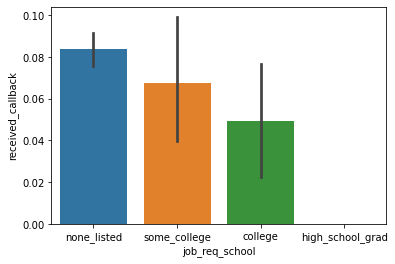

In [63]:
sns.barplot(x=df.job_req_school,y=df.received_callback)
plt.show()

In [64]:
# here in this column college and some_college can be teated as same 
# Value_Count of high_school_grad is too less i willl replace that with not_listed

In [65]:
df["job_req_school"] = df["job_req_school"].apply(lambda x: x.replace("some_college", "college"))

In [66]:
df["job_req_school"] = df["job_req_school"].apply(lambda x: x.replace("high_school_grad", "none_listed"))

In [67]:
df.job_req_school.value_counts()

none_listed    4396
college         474
Name: job_req_school, dtype: int64

In [68]:
df.job_city.value_counts()

Chicago    2704
Boston     2166
Name: job_city, dtype: int64

In [69]:
df.resume_quality.value_counts()

high    2446
low     2424
Name: resume_quality, dtype: int64

In [70]:
df.gender.value_counts()

f    3746
m    1124
Name: gender, dtype: int64

In [71]:
df.race.value_counts()

black    2435
white    2435
Name: race, dtype: int64

In [72]:
df.head()

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,0,...,0,0,6.0,1,0,0,0,1,0,low
1,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,0,...,0,1,6.0,1,0,1,1,0,1,high
2,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,0,...,0,1,6.0,1,0,0,0,0,0,low
3,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,0,...,0,0,6.0,1,1,1,0,1,1,high
4,Chicago,other_service,secretary,1,nonprofit,1,0,0,1,1,...,0,1,6.0,1,0,0,0,0,1,high


### Label_Encoding and One_Hot_Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

In [74]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['job_city', 'job_industry', 'job_type', 'job_ownership',
       'job_req_school', 'race', 'gender', 'resume_quality'],
      dtype='object')

In [75]:
#IF COLUMN HAS LESS THAN 2 UNIQUE CATEGORICAL VALUES THEN LABEL ENCODING, ELSE One_hot_encoding  WILL BE PERFORMED
for col in cat_cols:
    if len(df[col].unique()) <= 2:
        df[col] = Le.fit_transform(df[col])     

In [76]:
varlist=[]
for col in cat_cols:
    if len(df[col].unique()) > 2:
        varlist.append(col)
             

In [77]:
varlist

['job_industry', 'job_type', 'job_ownership']

In [78]:
dummy = pd.get_dummies(df['job_industry'], prefix  = 'job_industry')
dummy = dummy.drop(['job_industry_transportation_communication'], axis=1)
df = pd.concat([df, dummy], axis = 1)


In [79]:
dummy = pd.get_dummies(df['job_type'], prefix  = 'job_type')
dummy = dummy.drop(['job_type_supervisor'], axis=1)
df = pd.concat([df, dummy], axis = 1)


In [80]:
dummy = pd.get_dummies(df['job_ownership'], prefix  = 'job_ownership')
dummy = dummy.drop(['job_ownership_nonprofit'], axis=1)
df = pd.concat([df, dummy], axis = 1)


In [81]:
df.columns

Index(['job_city', 'job_industry', 'job_type', 'job_equal_opp_employer',
       'job_ownership', 'job_req_any', 'job_req_communication',
       'job_req_education', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'received_callback', 'race', 'gender',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address', 'resume_quality',
       'job_industry_business_and_personal_service',
       'job_industry_finance_insurance_real_estate',
       'job_industry_manufacturing', 'job_industry_other_service',
       'job_industry_wholesale_and_retail_trade', 'job_type_clerical',
       'job_type_manager', 'job_type_retail_sales', 'job_type_sales_rep',
       'job_type_secretary', 'job_ownership_private', 'job_ownership_public',
       'job_ownership_unknown'],
      dtype='object')

In [82]:
#dropping the original columns after dummy variable creation

df.drop(varlist,axis=1,inplace = True)

In [83]:
df.columns

Index(['job_city', 'job_equal_opp_employer', 'job_req_any',
       'job_req_communication', 'job_req_education', 'job_req_computer',
       'job_req_organization', 'job_req_school', 'received_callback', 'race',
       'gender', 'years_college', 'college_degree', 'honors',
       'worked_during_school', 'years_experience', 'computer_skills',
       'special_skills', 'volunteer', 'military', 'employment_holes',
       'has_email_address', 'resume_quality',
       'job_industry_business_and_personal_service',
       'job_industry_finance_insurance_real_estate',
       'job_industry_manufacturing', 'job_industry_other_service',
       'job_industry_wholesale_and_retail_trade', 'job_type_clerical',
       'job_type_manager', 'job_type_retail_sales', 'job_type_sales_rep',
       'job_type_secretary', 'job_ownership_private', 'job_ownership_public',
       'job_ownership_unknown'],
      dtype='object')

In [84]:
df.head()

,job_city,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,job_req_school,received_callback,race,...,job_industry_other_service,job_industry_wholesale_and_retail_trade,job_type_clerical,job_type_manager,job_type_retail_sales,job_type_sales_rep,job_type_secretary,job_ownership_private,job_ownership_public,job_ownership_unknown
0,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,1,1,1,0,1,...,1,0,0,0,0,0,1,0,0,0


## Train-Test Split 

In [85]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['received_callback']

y.head()

X=df.drop('received_callback', axis=1)

In [86]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 4264 to 3927
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   job_city                                    3409 non-null   int64  
 1   job_equal_opp_employer                      3409 non-null   int64  
 2   job_req_any                                 3409 non-null   int64  
 3   job_req_communication                       3409 non-null   int64  
 4   job_req_education                           3409 non-null   int64  
 5   job_req_computer                            3409 non-null   int64  
 6   job_req_organization                        3409 non-null   int64  
 7   job_req_school                              3409 non-null   int64  
 8   race                                        3409 non-null   int64  
 9   gender                                      3409 non-null   int64  
 10  years_col

### Scaling of Data

In [88]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,job_city,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,job_req_school,race,gender,...,job_industry_other_service,job_industry_wholesale_and_retail_trade,job_type_clerical,job_type_manager,job_type_retail_sales,job_type_sales_rep,job_type_secretary,job_ownership_private,job_ownership_public,job_ownership_unknown
4264,0.910958,1.603008,0.52064,-0.378408,-0.342012,1.143703,-0.272722,0.325730,0.999707,-0.546051,...,1,0,0,0,0,0,1,0,0,0
361,-1.097746,1.603008,0.52064,-0.378408,2.923871,-0.874353,-0.272722,0.325730,0.999707,1.831329,...,0,1,0,0,0,1,0,1,0,0
173,-1.097746,1.603008,0.52064,-0.378408,-0.342012,-0.874353,-0.272722,0.325730,0.999707,-0.546051,...,0,0,0,1,0,0,0,1,0,0
2704,0.910958,-0.623827,0.52064,-0.378408,-0.342012,1.143703,-0.272722,0.325730,-1.000293,-0.546051,...,0,0,0,0,0,0,1,0,0,1
44,0.910958,-0.623827,0.52064,-0.378408,2.923871,-0.874353,-0.272722,-3.070029,-1.000293,-0.546051,...,1,0,0,1,0,0,0,0,0,1


## Logistic Regression

### Model Building using Stats Model & RFE:


In [89]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([False, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('job_city', False, 2),
 ('job_equal_opp_employer', False, 5),
 ('job_req_any', False, 21),
 ('job_req_communication', False, 19),
 ('job_req_education', True, 1),
 ('job_req_computer', False, 13),
 ('job_req_organization', False, 6),
 ('job_req_school', True, 1),
 ('race', True, 1),
 ('gender', False, 17),
 ('years_college', False, 7),
 ('college_degree', True, 1),
 ('honors', False, 3),
 ('worked_during_school', False, 20),
 ('years_experience', False, 8),
 ('computer_skills', False, 10),
 ('special_skills', True, 1),
 ('volunteer', False, 12),
 ('military', False, 18),
 ('employment_holes', True, 1),
 ('has_email_address', False, 15),
 ('resume_quality', False, 11),
 ('job_industry_business_and_personal_service', True, 1),
 ('job_industry_finance_insurance_real_estate', True, 1),
 ('job_industry_manufacturing', True, 1),
 ('job_industry_other_service', True, 1),
 ('job_industry_wholesale_and_retail_trade', True, 1),
 ('job_type_clerical', True, 1),
 ('job_type_manager', False, 9),


In [92]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['job_req_education', 'job_req_school', 'race', 'college_degree',
       'special_skills', 'employment_holes',
       'job_industry_business_and_personal_service',
       'job_industry_finance_insurance_real_estate',
       'job_industry_manufacturing', 'job_industry_other_service',
       'job_industry_wholesale_and_retail_trade', 'job_type_clerical',
       'job_ownership_private', 'job_ownership_public',
       'job_ownership_unknown'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['job_city', 'job_equal_opp_employer', 'job_req_any',
       'job_req_communication', 'job_req_computer', 'job_req_organization',
       'gender', 'years_college', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'volunteer', 'military',
       'has_email_address', 'resume_quality', 'job_type_manager',
       'job_type_retail_sales', 'job_type_sales_rep', 'job_type_secretary'],
      dtype='object')

In [94]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -936.47
Date:                Thu, 29 Jun 2023   Deviance:                       1872.9
Time:                        14:22:58   Pearson chi2:                 3.46e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.8113    123.806     -0.023      0.982    -245.466     239.844
job_req_education                             -6.4024   4307.683     -0.001      0.999   -8449.306    8436.501
job_req_school                                -6.0751   4142.930     -0.001      0.999   -8126.068    8113.918
race                                           0.2920      0.064      4.539      0.000       0.166       0.418
college_degree                                 0.1649      0.067      2.452      0.014       0.033       0.297
special_skills                                 0.3805      0.062      6.105      0.000       0.258       0.503
employment_holes                               0.2467      0.066      3.740      0.000       0.117       0.376
job_industry_business_and_personal_service    -0.8101      0.315     -2.572      0.010      -1.428      -0.193
job_industry_finance_insurance_real_estate    -0.8823      0.360     -2.448      0.014      -1.589      -0.176
job_industry_manufacturing                    -0.9372      0.376     -2.490      0.013      -1.675      -0.200
job_industry_other_service                    -0.5865      0.319     -1.837      0.066      -1.212       0.039
job_industry_wholesale_and_retail_trade       -0.9729      0.322     -3.020      0.003      -1.604      -0.341
job_type_clerical                              0.2320      0.178      1.305      0.192      -0.116       0.580
job_ownership_private                          0.9377      0.353      2.654      0.008       0.245       1.630
job_ownership_public                           0.9920      0.407      2.437      0.015       0.194       1.790
job_ownership_unknown                          0.8270      0.337      2.457      0.014       0.167       1.487
==============================================================================================================
"""

p-value of variable job_req_school  is high, so we can drop it.

In [95]:
#dropping column with high p-value

col = col.drop('job_req_school',1)

In [96]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -938.03
Date:                Thu, 29 Jun 2023   Deviance:                       1876.1
Time:                        14:22:58   Pearson chi2:                 3.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6140      0.446     -5.861      0.000      -3.488      -1.740
job_req_education                             -0.1117      0.076     -1.468      0.142      -0.261       0.037
race                                           0.2919      0.064      4.539      0.000       0.166       0.418
college_degree                                 0.1669      0.067      2.485      0.013       0.035       0.299
special_skills                                 0.3827      0.062      6.143      0.000       0.261       0.505
employment_holes                               0.2475      0.066      3.753      0.000       0.118       0.377
job_industry_business_and_personal_service    -0.8167      0.315     -2.593      0.010      -1.434      -0.199
job_industry_finance_insurance_real_estate    -0.8917      0.360     -2.474      0.013      -1.598      -0.185
job_industry_manufacturing                    -0.9372      0.376     -2.491      0.013      -1.675      -0.200
job_industry_other_service                    -0.5905      0.319     -1.850      0.064      -1.216       0.035
job_industry_wholesale_and_retail_trade       -0.9802      0.322     -3.043      0.002      -1.611      -0.349
job_type_clerical                              0.2331      0.178      1.311      0.190      -0.115       0.582
job_ownership_private                          0.9203      0.353      2.607      0.009       0.228       1.612
job_ownership_public                           0.9590      0.406      2.360      0.018       0.163       1.755
job_ownership_unknown                          0.8046      0.336      2.394      0.017       0.146       1.463
==============================================================================================================
"""

p-value of variable job_req_education  is high, so we can drop it.

In [97]:
#dropping column with high p-value

col = col.drop('job_req_education',1)

In [98]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -939.19
Date:                Thu, 29 Jun 2023   Deviance:                       1878.4
Time:                        14:22:58   Pearson chi2:                 3.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6622      0.445     -5.976      0.000      -3.535      -1.789
race                                           0.2908      0.064      4.524      0.000       0.165       0.417
college_degree                                 0.1571      0.067      2.351      0.019       0.026       0.288
special_skills                                 0.3803      0.062      6.109      0.000       0.258       0.502
employment_holes                               0.2513      0.066      3.813      0.000       0.122       0.380
job_industry_business_and_personal_service    -0.8355      0.315     -2.653      0.008      -1.453      -0.218
job_industry_finance_insurance_real_estate    -0.9277      0.360     -2.576      0.010      -1.634      -0.222
job_industry_manufacturing                    -0.9857      0.375     -2.627      0.009      -1.721      -0.250
job_industry_other_service                    -0.6162      0.319     -1.931      0.054      -1.242       0.009
job_industry_wholesale_and_retail_trade       -0.9882      0.322     -3.065      0.002      -1.620      -0.356
job_type_clerical                              0.2563      0.177      1.446      0.148      -0.091       0.604
job_ownership_private                          0.9949      0.350      2.842      0.004       0.309       1.681
job_ownership_public                           1.0248      0.404      2.534      0.011       0.232       1.818
job_ownership_unknown                          0.8879      0.332      2.674      0.008       0.237       1.539
==============================================================================================================
"""

p-value of variable job_type_clerical  is high, so we can drop it.

In [99]:
#dropping column with high p-value

col = col.drop('job_type_clerical',1)

In [100]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3396
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -940.20
Date:                Thu, 29 Jun 2023   Deviance:                       1880.4
Time:                        14:22:58   Pearson chi2:                 3.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6229      0.445     -5.895      0.000      -3.495      -1.751
race                                           0.2891      0.064      4.501      0.000       0.163       0.415
college_degree                                 0.1446      0.066      2.188      0.029       0.015       0.274
special_skills                                 0.3853      0.062      6.207      0.000       0.264       0.507
employment_holes                               0.2565      0.066      3.901      0.000       0.128       0.385
job_industry_business_and_personal_service    -0.8202      0.315     -2.605      0.009      -1.437      -0.203
job_industry_finance_insurance_real_estate    -0.9204      0.360     -2.556      0.011      -1.626      -0.215
job_industry_manufacturing                    -0.9709      0.375     -2.588      0.010      -1.706      -0.236
job_industry_other_service                    -0.6046      0.320     -1.892      0.058      -1.231       0.022
job_industry_wholesale_and_retail_trade       -1.0028      0.322     -3.111      0.002      -1.635      -0.371
job_ownership_private                          0.9817      0.350      2.804      0.005       0.295       1.668
job_ownership_public                           1.0094      0.404      2.496      0.013       0.217       1.802
job_ownership_unknown                          0.8785      0.332      2.645      0.008       0.228       1.529
==============================================================================================================
"""

In [101]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3396
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -940.20
Date:                Thu, 29 Jun 2023   Deviance:                       1880.4
Time:                        14:22:58   Pearson chi2:                 3.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6229      0.445     -5.895      0.000      -3.495      -1.751
race                                           0.2891      0.064      4.501      0.000       0.163       0.415
college_degree                                 0.1446      0.066      2.188      0.029       0.015       0.274
special_skills                                 0.3853      0.062      6.207      0.000       0.264       0.507
employment_holes                               0.2565      0.066      3.901      0.000       0.128       0.385
job_industry_business_and_personal_service    -0.8202      0.315     -2.605      0.009      -1.437      -0.203
job_industry_finance_insurance_real_estate    -0.9204      0.360     -2.556      0.011      -1.626      -0.215
job_industry_manufacturing                    -0.9709      0.375     -2.588      0.010      -1.706      -0.236
job_industry_other_service                    -0.6046      0.320     -1.892      0.058      -1.231       0.022
job_industry_wholesale_and_retail_trade       -1.0028      0.322     -3.111      0.002      -1.635      -0.371
job_ownership_private                          0.9817      0.350      2.804      0.005       0.295       1.668
job_ownership_public                           1.0094      0.404      2.496      0.013       0.217       1.802
job_ownership_unknown                          0.8785      0.332      2.645      0.008       0.228       1.529
==============================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,job_ownership_private,6.26
11,job_ownership_unknown,5.36
4,job_industry_business_and_personal_service,4.20
8,job_industry_wholesale_and_retail_trade,3.70
7,job_industry_other_service,3.60
5,job_industry_finance_insurance_real_estate,2.07
6,job_industry_manufacturing,2.06
10,job_ownership_public,1.99
2,special_skills,1.10
1,college_degree,1.08


There is a high Multi-colinearity between two variables so we drop the variable with the higher VIF value

In [103]:
#dropping variable with high VIF

col = col.drop('job_ownership_private',1)

In [104]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3397
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -944.84
Date:                Thu, 29 Jun 2023   Deviance:                       1889.7
Time:                        14:22:59   Pearson chi2:                 3.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.7118      0.297     -5.761      0.000      -2.294      -1.129
race                                           0.2877      0.064      4.486      0.000       0.162       0.413
college_degree                                 0.1487      0.066      2.260      0.024       0.020       0.278
special_skills                                 0.3649      0.062      5.927      0.000       0.244       0.486
employment_holes                               0.2531      0.066      3.855      0.000       0.124       0.382
job_industry_business_and_personal_service    -0.8224      0.315     -2.614      0.009      -1.439      -0.206
job_industry_finance_insurance_real_estate    -0.9256      0.360     -2.572      0.010      -1.631      -0.220
job_industry_manufacturing                    -0.9429      0.375     -2.517      0.012      -1.677      -0.209
job_industry_other_service                    -0.7950      0.314     -2.534      0.011      -1.410      -0.180
job_industry_wholesale_and_retail_trade       -0.9968      0.322     -3.095      0.002      -1.628      -0.366
job_ownership_public                           0.1077      0.236      0.456      0.648      -0.355       0.570
job_ownership_unknown                          0.0744      0.136      0.545      0.586      -0.193       0.342
==============================================================================================================
"""

p-value of variable job_ownership_public  is high, so we can drop it.

In [105]:
#dropping column with high p-value

col = col.drop('job_ownership_public',1)

In [106]:
#BUILDING MODEL #6
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3398
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -944.94
Date:                Thu, 29 Jun 2023   Deviance:                       1889.9
Time:                        14:22:59   Pearson chi2:                 3.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.6809      0.289     -5.816      0.000      -2.247      -1.114
race                                           0.2875      0.064      4.483      0.000       0.162       0.413
college_degree                                 0.1503      0.066      2.288      0.022       0.022       0.279
special_skills                                 0.3638      0.062      5.914      0.000       0.243       0.484
employment_holes                               0.2536      0.066      3.862      0.000       0.125       0.382
job_industry_business_and_personal_service    -0.8407      0.312     -2.695      0.007      -1.452      -0.229
job_industry_finance_insurance_real_estate    -0.9352      0.359     -2.603      0.009      -1.639      -0.231
job_industry_manufacturing                    -0.9548      0.374     -2.555      0.011      -1.687      -0.222
job_industry_other_service                    -0.8150      0.310     -2.625      0.009      -1.424      -0.206
job_industry_wholesale_and_retail_trade       -1.0083      0.321     -3.140      0.002      -1.638      -0.379
job_ownership_unknown                          0.0606      0.133      0.457      0.648      -0.199       0.321
==============================================================================================================
"""

In [107]:
#dropping column with high p-value

col = col.drop('job_ownership_unknown',1)

In [108]:
#BUILDING MODEL #7
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 3409
Model:                            GLM   Df Residuals:                     3399
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -945.04
Date:                Thu, 29 Jun 2023   Deviance:                       1890.1
Time:                        14:22:59   Pearson chi2:                 3.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.6633      0.286     -5.809      0.000      -2.224      -1.102
race                                           0.2873      0.064      4.481      0.000       0.162       0.413
college_degree                                 0.1497      0.066      2.279      0.023       0.021       0.278
special_skills                                 0.3654      0.061      5.950      0.000       0.245       0.486
employment_holes                               0.2542      0.066      3.872      0.000       0.126       0.383
job_industry_business_and_personal_service    -0.8367      0.312     -2.683      0.007      -1.448      -0.225
job_industry_finance_insurance_real_estate    -0.9269      0.359     -2.583      0.010      -1.630      -0.224
job_industry_manufacturing                    -0.9619      0.373     -2.576      0.010      -1.694      -0.230
job_industry_other_service                    -0.7942      0.307     -2.586      0.010      -1.396      -0.192
job_industry_wholesale_and_retail_trade       -1.0074      0.321     -3.138      0.002      -1.637      -0.378
==============================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,special_skills,1.08
3,employment_holes,1.08
1,college_degree,1.07
8,job_industry_wholesale_and_retail_trade,1.02
5,job_industry_finance_insurance_real_estate,1.01
6,job_industry_manufacturing,1.01
0,race,1.00
4,job_industry_business_and_personal_service,1.00
7,job_industry_other_service,1.00


**So the Values all seem to be in order so now, Moving on to derive the Probabilities, Predictions on Train Data:**

In [110]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4264    0.218080
361     0.093928
173     0.068697
2704    0.039866
44      0.135690
2477    0.097199
2599    0.039866
475     0.148764
588     0.109502
4665    0.089562
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21808033, 0.09392764, 0.06869671, 0.03986568, 0.13568956,
       0.09719908, 0.03986568, 0.14876446, 0.10950169, 0.08956169])

In [112]:
y_train_pred_final = pd.DataFrame({'received_callback':y_train.values, 'received_callback_prob':y_train_pred})
y_train_pred_final.head()

,received_callback,received_callback_prob
0,0,0.218080
1,0,0.093928
2,0,0.068697
3,0,0.039866
4,0,0.135690


In [113]:
y_train_pred_final['Predicted'] = y_train_pred_final.received_callback_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,received_callback,received_callback_prob,Predicted
0,0,0.218080,0
1,0,0.093928,0
2,0,0.068697,0
3,0,0.039866,0
4,0,0.135690,0


In [114]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.received_callback, y_train_pred_final.Predicted )
print(confusion)

[[3120    0]
 [ 289    0]]


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.received_callback, y_train_pred_final.Predicted))

0.9152244059841596


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [119]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.0


In [120]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9152244059841596


### PLOTTING ROC CURVE

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.received_callback,y_train_pred_final.received_callback_prob, drop_intermediate = False )

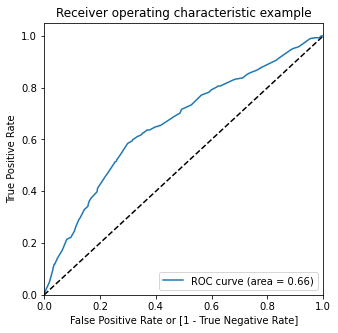

In [124]:
draw_roc(y_train_pred_final.received_callback, y_train_pred_final.received_callback_prob)

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.received_callback_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,received_callback,received_callback_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.218080,0,1,1,1,0,0,0,0,0,0,0
1,0,0.093928,0,1,0,0,0,0,0,0,0,0,0
2,0,0.068697,0,1,0,0,0,0,0,0,0,0,0
3,0,0.039866,0,1,0,0,0,0,0,0,0,0,0
4,0,0.135690,0,1,1,0,0,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.received_callback, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084776  1.000000  0.000000
0.1   0.1  0.699032  0.567474  0.711218
0.2   0.2  0.894984  0.096886  0.968910
0.3   0.3  0.914638  0.006920  0.998718
0.4   0.4  0.915224  0.000000  1.000000
0.5   0.5  0.915224  0.000000  1.000000
0.6   0.6  0.915224  0.000000  1.000000
0.7   0.7  0.915224  0.000000  1.000000
0.8   0.8  0.915224  0.000000  1.000000
0.9   0.9  0.915224  0.000000  1.000000


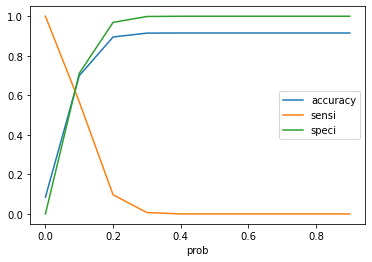

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [128]:
#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.received_callback_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,received_callback,received_callback_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.218080,0,1,1,1,0,0,0,0,0,0,0,1
1,0,0.093928,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.068697,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.039866,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.135690,0,1,1,0,0,0,0,0,0,0,0,1


In [129]:
y_train_pred_final['received_callback_Score'] = y_train_pred_final.received_callback_prob.map( lambda x: round(x*100))
y_train_pred_final[['received_callback','received_callback_prob','final_Predicted','received_callback_Score']].head()

,received_callback,received_callback_prob,final_Predicted,received_callback_Score
0,0,0.218080,1,22
1,0,0.093928,0,9
2,0,0.068697,0,7
3,0,0.039866,0,4
4,0,0.135690,1,14


In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.received_callback, y_train_pred_final.final_Predicted)

0.6990319741859783

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.received_callback, y_train_pred_final.final_Predicted )
confusion2

array([[2219,  901],
       [ 125,  164]])

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5674740484429066

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.7112179487179487

### PLOTTING ROC CURVE

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.received_callback, 
                                         y_train_pred_final.final_Predicted, drop_intermediate = False )

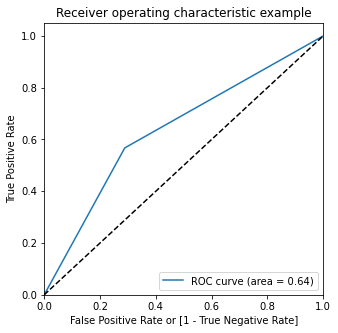

In [137]:
draw_roc(y_train_pred_final.received_callback, y_train_pred_final.final_Predicted)

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 69.90%
- Sensitivity : 56.74%
- Specificity : 71.12%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [138]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.28878205128205126


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.1539906103286385


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9466723549488054


In [141]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.received_callback, y_train_pred_final.final_Predicted )
confusion

array([[2219,  901],
       [ 125,  164]])

In [142]:
len(X_train[col].columns)

9

In [143]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.1539906103286385

In [144]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5674740484429066

In [145]:
from sklearn.metrics import precision_score, recall_score

In [146]:
precision_score(y_train_pred_final.received_callback , y_train_pred_final.final_Predicted)

0.1539906103286385

In [147]:
recall_score(y_train_pred_final.received_callback, y_train_pred_final.final_Predicted)

0.5674740484429066

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.received_callback, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.received_callback, y_train_pred_final.received_callback_prob)

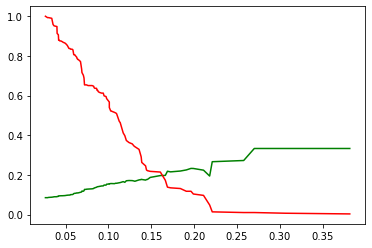

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [151]:
X_train[col].columns

Index(['race', 'college_degree', 'special_skills', 'employment_holes',
       'job_industry_business_and_personal_service',
       'job_industry_finance_insurance_real_estate',
       'job_industry_manufacturing', 'job_industry_other_service',
       'job_industry_wholesale_and_retail_trade'],
      dtype='object')

### PREDICTIONS ON TEST SET

In [152]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,job_city,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,job_req_school,race,gender,...,job_industry_other_service,job_industry_wholesale_and_retail_trade,job_type_clerical,job_type_manager,job_type_retail_sales,job_type_sales_rep,job_type_secretary,job_ownership_private,job_ownership_public,job_ownership_unknown
3954,0.858614,1.468165,0.517908,-0.37604,-0.35437,1.113911,3.373627,0.334473,-0.999316,-0.551783,...,0,0,0,0,0,0,1,1,0,0
4024,0.858614,-0.681122,0.517908,-0.37604,-0.35437,-0.897738,-0.296417,0.334473,1.000685,-0.551783,...,0,1,1,0,0,0,0,0,1,0
4252,0.858614,-0.681122,-1.930843,-0.37604,-0.35437,-0.897738,-0.296417,0.334473,1.000685,1.812307,...,0,1,0,1,0,0,0,0,0,1
3169,-1.164668,-0.681122,0.517908,-0.37604,-0.35437,-0.897738,-0.296417,0.334473,1.000685,-0.551783,...,0,1,0,0,1,0,0,1,0,0
159,0.858614,-0.681122,0.517908,2.65929,-0.35437,-0.897738,-0.296417,0.334473,-0.999316,1.812307,...,0,0,0,0,1,0,0,0,0,1


In [153]:
X_test1 = X_test[col]
X_test1.head()

,race,college_degree,special_skills,employment_holes,job_industry_business_and_personal_service,job_industry_finance_insurance_real_estate,job_industry_manufacturing,job_industry_other_service,job_industry_wholesale_and_retail_trade
3954,-0.999316,0.639431,-0.690833,-0.896495,1,0,0,0,0
4024,1.000685,0.639431,-0.690833,1.115455,0,0,0,0,1
4252,1.000685,0.639431,1.447529,1.115455,0,0,0,0,1
3169,1.000685,0.639431,-0.690833,-0.896495,0,0,0,0,1
159,-0.999316,-1.563891,1.447529,1.115455,1,0,0,0,0


In [154]:
X_test_sm = sm.add_constant(X_test1)

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

3954    0.040243
4024    0.094800
4252    0.186196
3169    0.059089
159     0.098977
4684    0.104010
4514    0.101936
791     0.137479
2369    0.169171
355     0.041916
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

,0
3954,0.040243
4024,0.094800
4252,0.186196
3169,0.059089
159,0.098977


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

,received_callback,0
0,0,0.040243
1,0,0.094800
2,0,0.186196
3,0,0.059089
4,0,0.098977


In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'received_callback_prob'})

In [164]:
# Rearranging the columns
y_pred_final = y_pred_final[['received_callback','received_callback_prob']]
y_pred_final['received_callback_score'] = y_pred_final.received_callback_prob.map( lambda x: round(x*100))

In [165]:
# Let's see the head of y_pred_final
y_pred_final.head()

,received_callback,received_callback_prob,received_callback_score
0,0,0.040243,4
1,0,0.094800,9
2,0,0.186196,19
3,0,0.059089,6
4,0,0.098977,10


In [166]:
y_pred_final['final_Predicted'] = y_pred_final.received_callback_prob.map(lambda x: 1 if x > 0.1 else 0)

In [167]:
y_pred_final.head()

,received_callback,received_callback_prob,received_callback_score,final_Predicted
0,0,0.040243,4,0
1,0,0.094800,9,0
2,0,0.186196,19,1
3,0,0.059089,6,0
4,0,0.098977,10,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.received_callback, y_pred_final.final_Predicted)

0.6735112936344969

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.received_callback, y_pred_final.final_Predicted )
confusion2

array([[939, 419],
       [ 58,  45]])

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4368932038834951

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.6914580265095729

In [173]:
precision_score(y_pred_final.received_callback , y_pred_final.final_Predicted)

0.09698275862068965

In [174]:
recall_score(y_pred_final.received_callback , y_pred_final.final_Predicted)

0.4368932038834951

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 67.35%
- Sensitivity : 43.68%
- Specificity : 69.14%

##  DecisionTree

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

### Hyper-parameter tuning

In [176]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
    
}

In [177]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1)

In [178]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

### DT model evaluation

In [179]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [180]:
grid_search.best_score_


0.9152247212784375

In [181]:
cv_df = pd.DataFrame(grid_search.cv_results_)


In [182]:
cv_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013122,0.000842,0.005955,0.001484,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
1,0.012627,0.000785,0.006204,0.000642,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
2,0.012839,0.001497,0.005296,0.000443,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
3,0.013245,0.001229,0.005916,0.000945,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
4,0.013208,0.001375,0.005056,0.000358,2,100,"{'max_depth': 2, 'min_samples_leaf': 100}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1


In [183]:
cv_df.sort_values(by='rank_test_score').head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013122,0.000842,0.005955,0.001484,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
22,0.020630,0.002418,0.005430,0.001575,20,20,"{'max_depth': 20, 'min_samples_leaf': 20}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
19,0.014844,0.001445,0.004393,0.000294,10,100,"{'max_depth': 10, 'min_samples_leaf': 100}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
18,0.015705,0.001698,0.005122,0.001505,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
17,0.017171,0.000498,0.004654,0.000199,10,20,"{'max_depth': 10, 'min_samples_leaf': 20}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1


In [184]:
cv_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013122,0.000842,0.005955,0.001484,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
1,0.012627,0.000785,0.006204,0.000642,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
2,0.012839,0.001497,0.005296,0.000443,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
3,0.013245,0.001229,0.005916,0.000945,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
4,0.013208,0.001375,0.005056,0.000358,2,100,"{'max_depth': 2, 'min_samples_leaf': 100}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1


In [185]:
sel_cols = ['param_max_depth','param_min_samples_leaf','params', 'rank_test_score',  'mean_test_score']

In [186]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)


,param_max_depth,param_min_samples_leaf,params,rank_test_score,mean_test_score
0,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",1,0.915225
22,20,20,"{'max_depth': 20, 'min_samples_leaf': 20}",1,0.915225
19,10,100,"{'max_depth': 10, 'min_samples_leaf': 100}",1,0.915225
18,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",1,0.915225
17,10,20,"{'max_depth': 10, 'min_samples_leaf': 20}",1,0.915225
14,5,100,"{'max_depth': 5, 'min_samples_leaf': 100}",1,0.915225
13,5,50,"{'max_depth': 5, 'min_samples_leaf': 50}",1,0.915225
23,20,50,"{'max_depth': 20, 'min_samples_leaf': 50}",1,0.915225
9,3,100,"{'max_depth': 3, 'min_samples_leaf': 100}",1,0.915225
12,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",1,0.915225


In [187]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
 

In [188]:
dt_best = grid_search.best_estimator_


In [189]:
y_train_pred = dt_best.predict(X_train)


In [190]:
y_test_pred = dt_best.predict(X_test)


In [191]:
print(classification_report(y_train,dt_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3120
           1       0.00      0.00      0.00       289

    accuracy                           0.92      3409
   macro avg       0.46      0.50      0.48      3409
weighted avg       0.84      0.92      0.87      3409



In [192]:
print(classification_report(y_test,dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1358
           1       0.00      0.00      0.00       103

    accuracy                           0.93      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.86      0.93      0.90      1461



In [193]:
accuracy_score(y_train, y_train_pred)

0.9152244059841596

In [194]:
accuracy_score(y_test, y_test_pred)

0.9295003422313484

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
cross_val_score(dt_best, X_train, y_train, cv=5, n_jobs=-1)

array([0.91495601, 0.91495601, 0.91495601, 0.91495601, 0.91629956])

In [197]:
cross_val_score(dt_best, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9152247212784375

[Text(418.5, 453.0, 'X[16] <= 0.359\ngini = 0.155\nsamples = 3409\nvalue = [3120, 289]'),
 Text(209.25, 271.8, 'X[14] <= 1.041\ngini = 0.118\nsamples = 2280\nvalue = [2137, 143]'),
 Text(104.625, 90.59999999999997, 'gini = 0.108\nsamples = 1998\nvalue = [1884, 114]'),
 Text(313.875, 90.59999999999997, 'gini = 0.185\nsamples = 282\nvalue = [253, 29]'),
 Text(627.75, 271.8, 'X[8] <= -0.0\ngini = 0.225\nsamples = 1129\nvalue = [983, 146]'),
 Text(523.125, 90.59999999999997, 'gini = 0.167\nsamples = 555\nvalue = [504, 51]'),
 Text(732.375, 90.59999999999997, 'gini = 0.276\nsamples = 574\nvalue = [479, 95]')]

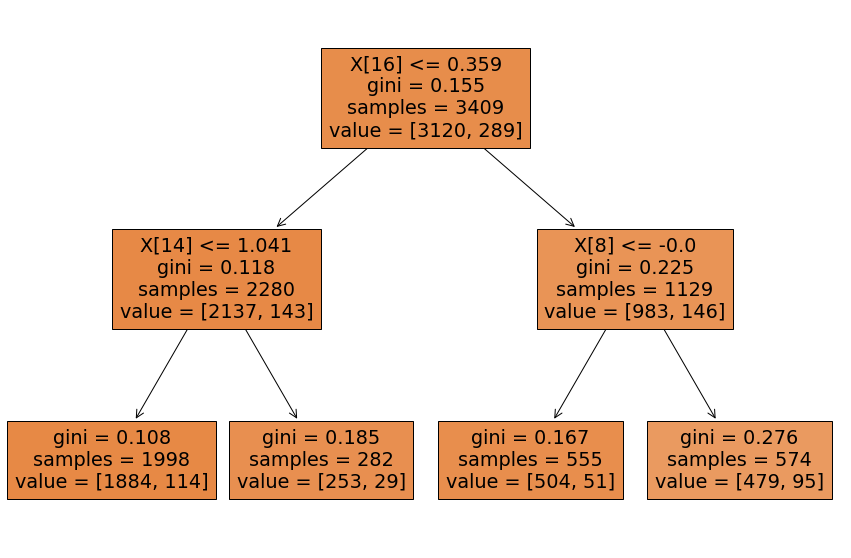

In [198]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_best,filled=True)

## Random forest

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

### Performance on the train set



In [200]:
y_train_pred = rf.predict(X_train)


In [201]:
accuracy_score(y_train, y_train_pred)

0.9903197418597829

### Performance on unseen data



In [202]:
y_test_pred = rf.predict(X_test)


In [203]:
accuracy_score(y_test, y_test_pred)

0.9240246406570842

In [204]:
rf.oob_score_

0.9078908770900558

### Model evaluation: Cross validation

In [205]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

array([0.91055718, 0.90615836, 0.90909091, 0.91202346, 0.91189427])

In [206]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9099448370302428

#### Scoring methods in Cross val score

In [207]:
import sklearn
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [208]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.03448276, 0.01724138, 0.01724138, 0.01724138, 0.03508772])

### Hyper-parameter tuning using GridSearchCV

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [210]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [5, 10, 15, 20, 25],
               }

In [211]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1)


In [212]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [5, 10, 15, 20, 25]},
             verbose=1)

In [213]:
model_cv.best_score_


0.9152247212784375

In [214]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=3, max_features=5, n_jobs=-1, random_state=42)

In [215]:
cv_df = pd.DataFrame(model_cv.cv_results_)


In [216]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.462058,0.085206,0.061400,0.010348,3,5,"{'max_depth': 3, 'max_features': 5}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
1,0.461696,0.030346,0.065510,0.014825,3,10,"{'max_depth': 3, 'max_features': 10}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
2,0.504896,0.015670,0.056316,0.014481,3,15,"{'max_depth': 3, 'max_features': 15}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
3,0.575072,0.025981,0.046884,0.002288,3,20,"{'max_depth': 3, 'max_features': 20}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
4,0.569935,0.007880,0.048356,0.001878,3,25,"{'max_depth': 3, 'max_features': 25}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1


In [217]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.462058,0.085206,0.061400,0.010348,3,5,"{'max_depth': 3, 'max_features': 5}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
10,0.598282,0.059974,0.048900,0.002823,10,5,"{'max_depth': 10, 'max_features': 5}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
9,0.698721,0.055304,0.051963,0.009550,5,25,"{'max_depth': 5, 'max_features': 25}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
8,0.632405,0.034927,0.048558,0.005329,5,20,"{'max_depth': 5, 'max_features': 20}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1
7,0.592651,0.063417,0.050580,0.006709,5,15,"{'max_depth': 5, 'max_features': 15}",0.914956,0.914956,0.914956,0.914956,0.9163,0.915225,0.000537,1


In [218]:
sel_cols = ['param_max_depth','param_max_features',  'mean_test_score']

In [219]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(10)

,param_max_depth,param_max_features,mean_test_score
0,3,5,0.915225
10,10,5,0.915225
9,5,25,0.915225
8,5,20,0.915225
7,5,15,0.915225
6,5,10,0.915225
12,10,15,0.915225
4,3,25,0.915225
3,3,20,0.915225
2,3,15,0.915225


### Extracting the best model and asessing test performance

In [220]:
model_cv.best_score_

0.9152247212784375

In [221]:
rf_best1 = model_cv.best_estimator_


In [222]:
rf_best1


RandomForestClassifier(max_depth=3, max_features=5, n_jobs=-1, random_state=42)

In [223]:
y_test_pred = rf_best1.predict(X_test)

In [224]:
accuracy_score(y_test, y_test_pred)

0.9295003422313484

In [225]:
print(classification_report(y_train, rf_best1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3120
           1       0.00      0.00      0.00       289

    accuracy                           0.92      3409
   macro avg       0.46      0.50      0.48      3409
weighted avg       0.84      0.92      0.87      3409



In [226]:
print(classification_report(y_test, rf_best1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1358
           1       0.00      0.00      0.00       103

    accuracy                           0.93      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.86      0.93      0.90      1461



## K Nearest Neighbor (KNN)

In [227]:
from sklearn.neighbors import KNeighborsClassifier


In [228]:
?KNeighborsClassifier

In [229]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='uniform', 
                     algorithm='auto', n_jobs=-1)

In [230]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [231]:
y_train_pred = KNN.predict(X_train)

In [232]:
accuracy_score(y_train, y_train_pred)

0.9193311821648578

### Performance on unseen data

In [233]:
y_test_pred = KNN.predict(X_test)

In [234]:
accuracy_score(y_test,y_test_pred )

0.9247091033538672

### Model evaluation: Cross validation

In [235]:
cross_val_score(KNN, X_train, y_train, cv=5, n_jobs=-1)

array([0.91202346, 0.91055718, 0.90175953, 0.90469208, 0.91189427])

In [236]:
cross_val_score(KNN, X_train, y_train, cv=5, n_jobs=-1).mean()

0.908185306238454

In [237]:
cross_val_score(KNN, X_train, y_train, cv=5, n_jobs=-1, scoring="f1")

array([0.        , 0.03174603, 0.02898551, 0.        , 0.0625    ])

### Hyper-parameter tuning using GridSearchCV


In [238]:
hyper_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance']
        }

In [239]:
Model = GridSearchCV(KNN, param_grid=hyper_params, verbose = 1, cv=5, n_jobs = -1)


In [240]:
Model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [241]:
Model.best_score_


0.9152247212784375

In [242]:
Model.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [243]:
# use the best hyperparameters i.e n=11
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform',metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [244]:
y_train_pred = knn.predict(X_train)

In [245]:
y_test_pred = knn.predict(X_test)

### Model Evaluation


In [246]:
accuracy_score(y_train, y_train_pred)

0.9155177471399237

In [247]:
accuracy_score(y_test, y_test_pred)

0.9295003422313484

In [248]:
cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1).mean()


0.9152247212784375

In [249]:
cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1, scoring="f1")

array([0., 0., 0., 0., 0.])

In [250]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3120
           1       1.00      0.00      0.01       289

    accuracy                           0.92      3409
   macro avg       0.96      0.50      0.48      3409
weighted avg       0.92      0.92      0.88      3409



In [251]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1358
           1       0.00      0.00      0.00       103

    accuracy                           0.93      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.86      0.93      0.90      1461



## Naive Bayes 

In [252]:
from sklearn.naive_bayes import GaussianNB

In [253]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [254]:
y_train_pred = gnb.predict(X_train)

In [255]:
accuracy_score(y_train, y_train_pred)

0.8609562921677911

### Performance on unseen data

In [256]:
y_test_pred = gnb.predict(X_test)

In [257]:
accuracy_score(y_test, y_test_pred)

0.8850102669404517

### Model evaluation: Cross validation

In [258]:
cross_val_score(gnb, X_train, y_train, cv=5, n_jobs=-1)

array([0.85190616, 0.85483871, 0.85777126, 0.86070381, 0.86049927])

In [259]:
cross_val_score(gnb, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8571438414269167

In [260]:
cross_val_score(gnb, X_train, y_train, cv=5, n_jobs=-1, scoring="f1")

array([0.1512605 , 0.15384615, 0.18487395, 0.22764228, 0.17391304])

In [261]:
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion

array([[1269,   89],
       [  79,   24]])

<AxesSubplot:>

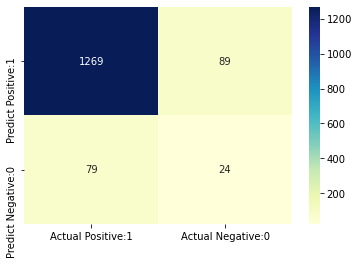

In [262]:
cm_matrix = pd.DataFrame(data=confusion, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [263]:
print(classification_report(y_train, gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3120
           1       0.19      0.20      0.20       289

    accuracy                           0.86      3409
   macro avg       0.56      0.56      0.56      3409
weighted avg       0.86      0.86      0.86      3409



In [264]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1358
           1       0.21      0.23      0.22       103

    accuracy                           0.89      1461
   macro avg       0.58      0.58      0.58      1461
weighted avg       0.89      0.89      0.89      1461



## Ada boost

In [265]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(X_train, y_train)

y_train_pred = adaBoost.predict(X_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.9152244059841596

### Performance on unseen data

In [266]:
y_test_pred = adaBoost.predict(X_test)

In [267]:
accuracy_score(y_test, y_test_pred)

0.9295003422313484

### Using GridSearch and Cross-Validation 


In [268]:
ada = AdaBoostClassifier(base_estimator= None)

parameters = {'n_estimators':[100,200,300,500,800, 1000,2000],
              'learning_rate':[0.1,0.01,0.5,1]
              }
grid = GridSearchCV(estimator=ada,
                     param_grid=parameters,
                     cv=5,
                     n_jobs = -1,verbose = 1)
#grid.fit(X_train, y_train) 

In [269]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500, 800, 1000, 2000]},
             verbose=1)

In [270]:
grid.best_score_


0.9152247212784375

In [271]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

### Extracting the best model and asessing test performance

In [272]:

adab = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1,random_state=42)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [273]:
y_train_pred = adab.predict(X_train)

In [274]:
y_test_pred = adab.predict(X_test)

### Model Evaluation


In [275]:
accuracy_score(y_train, y_train_pred)

0.9152244059841596

In [276]:
accuracy_score(y_test, y_test_pred)

0.9295003422313484

In [277]:
cross_val_score(adab, X_train, y_train, cv=5, n_jobs=-1)

array([0.91495601, 0.91495601, 0.91495601, 0.91495601, 0.91629956])

In [278]:
cross_val_score(adab, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9152247212784375

In [279]:
print(classification_report(y_train, adab.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3120
           1       0.00      0.00      0.00       289

    accuracy                           0.92      3409
   macro avg       0.46      0.50      0.48      3409
weighted avg       0.84      0.92      0.87      3409



In [280]:
print(classification_report(y_test, adab.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1358
           1       0.00      0.00      0.00       103

    accuracy                           0.93      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.86      0.93      0.90      1461



## Gradient_boosting 

In [281]:
from sklearn.ensemble import GradientBoostingClassifier
grad= GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, 
                                  subsample=1,max_features='sqrt', random_state=10)

grad.fit(X_train, y_train)

y_train_pred = grad.predict(X_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.9158110882956879

### Performance on unseen data

In [282]:
y_test_pred = adaBoost.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9295003422313484

### Using GridSearch and Cross-Validation with the whole dataset


In [283]:
gb = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

parameters1 = {'n_estimators':[100,200,300,500,800, 1000,2000],
              'learning_rate':[0.1,0.01,0.5,1]
              }
grid = GridSearchCV(estimator=gb,
                     param_grid=parameters1,
                     scoring='f1',
                     cv=5,
                     n_jobs = -1,verbose = 1)

In [284]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500, 800, 1000, 2000]},
             scoring='f1', verbose=1)

In [285]:
grid.best_score_


0.1533521389848203

In [286]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=1000, random_state=10, subsample=0.8)

In [287]:
parameters2 = { 'min_samples_split':[50,80,100,200,400,500]
                    }

In [288]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1, max_depth=8, max_features='sqrt',
                     n_estimators=1000, random_state=10, subsample=0.8),
                     param_grid=parameters2,
                     scoring='f1',
                     cv=5,
                     n_jobs = -1,verbose = 1)

In [289]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=1, max_depth=8,
                                                  max_features='sqrt',
                                                  n_estimators=1000,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'min_samples_split': [50, 80, 100, 200, 400, 500]},
             scoring='f1', verbose=1)

In [290]:
grid.best_score_

0.1503395789589438

In [291]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=8, max_features='sqrt',
                           min_samples_split=50, n_estimators=1000,
                           random_state=10, subsample=0.8)

In [292]:
?GridSearchCV

In [293]:
parameters3 = { 'max_depth':[4,5,6,7,8,9],
                'min_samples_leaf':[1,10,20,30,40,50]
                    }

In [294]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1, max_features='sqrt',
                           n_estimators=1000,
                           random_state=10, subsample=0.8),
                     param_grid=parameters3,
                     scoring='f1',
                     cv=5,
                     n_jobs = -1,verbose = 1)

In [295]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=1,
                                                  max_features='sqrt',
                                                  n_estimators=1000,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 10, 20, 30, 40, 50]},
             scoring='f1', verbose=1)

In [296]:
grid.best_score_

0.15992770534424006

In [297]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=4, max_features='sqrt',
                           min_samples_leaf=50, n_estimators=1000,
                           random_state=10, subsample=0.8)

### Extracting the best model and asessing test performance


In [298]:
gb_b = GradientBoostingClassifier(learning_rate=1, max_depth=4, max_features='sqrt',
                           min_samples_leaf=50, n_estimators=1000,
                           random_state=10, subsample=0.8)
gb_b.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=4, max_features='sqrt',
                           min_samples_leaf=50, n_estimators=1000,
                           random_state=10, subsample=0.8)

In [299]:
y_train_pred = gb_b.predict(X_train)

In [300]:
y_test_pred = gb_b.predict(X_test)

### Model Evaluation


In [301]:
accuracy_score(y_train, y_train_pred)

0.9888530360809622

In [302]:
accuracy_score(y_test, y_test_pred)

0.8781656399726215

In [303]:
cross_val_score(gb_b, X_train, y_train, cv=5, n_jobs=-1)

array([0.87829912, 0.86656891, 0.87096774, 0.87536657, 0.85315712])

In [304]:
cross_val_score(gb_b, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8688718935841289

In [305]:
print(classification_report(y_train, gb_b.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3120
           1       0.97      0.90      0.93       289

    accuracy                           0.99      3409
   macro avg       0.98      0.95      0.96      3409
weighted avg       0.99      0.99      0.99      3409



In [306]:
print(classification_report(y_test, gb_b.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1358
           1       0.16      0.17      0.16       103

    accuracy                           0.88      1461
   macro avg       0.55      0.55      0.55      1461
weighted avg       0.88      0.88      0.88      1461



##  XG_Boost 

In [307]:
!pip install xgboost

In [308]:
from xgboost import XGBClassifier

xgb= XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9152244059841596

### Performance on unseen data

In [309]:
y_test_pred = xgb.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9295003422313484

### Using GridSearch and Cross-Validation 


In [310]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)

gsearch1.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
           

In [311]:
gsearch1.best_score_

0.6470727756061241

In [312]:
gsearch1.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [313]:
#  max_depth=3, min_child_weight=1

In [314]:
param_test2 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)

In [315]:
gsearch2.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,


In [316]:
gsearch2.best_score_

0.6530333833589278

In [317]:
gsearch2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [318]:
param_test3 = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [50,65,80,100,115,130,150]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( base_score=None, booster=None, callbacks=None,
            enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.2, learning_rate=0.1,
              n_estimators=140, subsample=0.8, 
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)

In [319]:
gsearch3.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=3.2, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, 

In [320]:
gsearch3.best_score_

0.6425259725906278

In [321]:
gsearch3.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=65, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [328]:
param_test4 = {
    'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( gamma=3.2, learning_rate=0.1,
              n_estimators=140, subsample=0.8, 
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,colsample_bytree=0.8,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)

In [330]:
gsearch4.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=3.2, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
         

In [331]:
gsearch4.best_score_

0.6501908437650272

In [332]:
gsearch4.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

### Extracting the best model and asessing test performance


In [346]:
xgb_b = XGBClassifier(max_depth=3, learning_rate=0.06, n_estimators=100, gamma=3.2, 
                        min_child_weight=1, subsample=0.8,reg_alpha=0.005,reg_lambda=0.1)
xgb_b.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [347]:
y_train_pred = xgb_b.predict(X_train)

In [348]:
y_test_pred = xgb_b.predict(X_test)

### Model Evaluation

In [349]:
accuracy_score(y_train, y_train_pred)

0.9152244059841596

In [350]:
accuracy_score(y_test, y_test_pred)

0.9295003422313484

In [351]:
cross_val_score(xgb_b, X_train, y_train, cv=5, n_jobs=-1)

array([0.91495601, 0.91495601, 0.91495601, 0.91495601, 0.91629956])

In [352]:
cross_val_score(xgb_b, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9152247212784375

In [353]:
print(classification_report(y_train, xgb_b.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3120
           1       0.00      0.00      0.00       289

    accuracy                           0.92      3409
   macro avg       0.46      0.50      0.48      3409
weighted avg       0.84      0.92      0.87      3409



In [354]:
print(classification_report(y_test, xgb_b.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1358
           1       0.00      0.00      0.00       103

    accuracy                           0.93      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.86      0.93      0.90      1461



## SVM

In [357]:
from sklearn.svm import SVC
svc=SVC() 
svc.fit(X_train, y_train)
y_train_pred=svc.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9152244059841596

In [358]:
y_test_pred=svc.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9295003422313484

In [359]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1358
           1       0.00      0.00      0.00       103

    accuracy                           0.93      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.86      0.93      0.90      1461



In [361]:
# Apply SVM model using polynomial Kernel function 
poly_classifier=SVC(kernel='poly').fit(X_train,y_train)
y_train_pred = poly_classifier.predict(X_train)
accuracy_score(y_train, y_train_pred)


0.9234379583455559

In [362]:
y_test_pred = poly_classifier.predict(X_test)
accuracy_score(y_test, y_test_pred)


0.9247091033538672

In [363]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96      1358\n           1       0.00      0.00      0.00       103\n\n    accuracy                           0.92      1461\n   macro avg       0.46      0.50      0.48      1461\nweighted avg       0.86      0.92      0.89      1461\n'

In [364]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_train)
accuracy_score(y_train, y_train_pred)


0.9234379583455559

In [366]:
y_test_pred = Poly_svc.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9117043121149897

In [369]:
print(classification_report(y_train, Poly_svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3120
           1       0.04      0.01      0.02       289

    accuracy                           0.89      3409
   macro avg       0.48      0.49      0.48      3409
weighted avg       0.84      0.89      0.86      3409

